In [2]:
# Install RDKit.
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 22.4 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
from rdkit import Chem  # RDKit library for working with molecules
from rdkit.Chem import Draw, AllChem, MACCSkeys  # Submodules for molecule visualization, fingerprints, and shape comparison
import pandas as pd  # Library for data manipulation and analysis
from rdkit import DataStructs # Import module for working with fingerprint similarity
import requests
import matplotlib.pyplot as plt

## Query molecule: HMG-CoA

*Depict one molecule with its Smiles*
    
 CC(C)CC1=CC=C(C=C1)C(C)C(=O)O

In [4]:
# Load a molecule from SMILES
smiles = 'CC(C)(CO[P@@](=O)(O)O[P@@](=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O)[C@@H](O)C(=O)NCCC(=O)NCCSC(=O)C[C@@](C)(O)CC(=O)O'
mol = Chem.MolFromSmiles(smiles) # convert the SMILES string into an RDKit molecule object

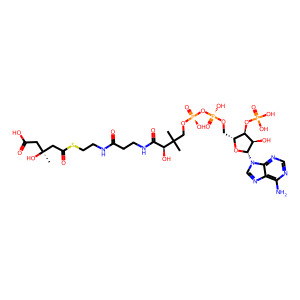

In [ ]:
# Draw the molecule
Draw.MolToImage(mol)

EmbedMolecule and MMFFOOptimizeMolecule functions from RDKit's AllChem module do not return a molecule object with 3D coordinates. Instead, it modifies the provided molecule object in place by adding 3D coordinates to it.

#############

# EMPIEZA AQUÍ MI PARTE

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I process the pharmacore's compounds obtained using Pharmit.

In [7]:
file=open ('/content/drive/MyDrive/Colab Notebooks/Structur/final/1dq9_pharmacophore.sdf')
text=file.read()
import re

# Define a regular expression pattern to match ChEMBL IDs
chembl_pattern = re.compile(r'CHEMBL\d+')

# Find all occurrences of ChEMBL IDs in the text
chembl_ids = chembl_pattern.findall(text)

# Print the extracted ChEMBL IDs
print(chembl_ids)

['CHEMBL4538120', 'CHEMBL1949897', 'CHEMBL3652606', 'CHEMBL261903', 'CHEMBL448348', 'CHEMBL364095', 'CHEMBL3542421', 'CHEMBL1161683', 'CHEMBL499145', 'CHEMBL4764378', 'CHEMBL262525', 'CHEMBL1092368', 'CHEMBL166856', 'CHEMBL2058991', 'CHEMBL385301', 'CHEMBL3747873', 'CHEMBL1161409', 'CHEMBL4094217', 'CHEMBL2059741', 'CHEMBL2431069', 'CHEMBL607917', 'CHEMBL1092358', 'CHEMBL3251364', 'CHEMBL409017', 'CHEMBL2304368', 'CHEMBL2016845', 'CHEMBL3897848', 'CHEMBL3350526', 'CHEMBL4757883', 'CHEMBL1207277', 'CHEMBL316236', 'CHEMBL502712', 'CHEMBL401150', 'CHEMBL1163477', 'CHEMBL1076769', 'CHEMBL407558', 'CHEMBL2037050', 'CHEMBL3980482', 'CHEMBL4439305', 'CHEMBL2078827', 'CHEMBL1207869', 'CHEMBL393164', 'CHEMBL2058767', 'CHEMBL3251375', 'CHEMBL365498', 'CHEMBL4060094', 'CHEMBL308715', 'CHEMBL4596142', 'CHEMBL1185297', 'CHEMBL405871', 'CHEMBL1651410', 'CHEMBL363981', 'CHEMBL1213878', 'CHEMBL506814', 'CHEMBL94507', 'CHEMBL1331383', 'CHEMBL610609', 'CHEMBL605439', 'CHEMBL2311620', 'CHEMBL216083', 'CH

In [9]:
len(chembl_ids)

404

In [12]:
#CITATION: Code from https://github.com/chembl/notebooks/blob/main/ChEMBL_webresource_client_examples.ipynb
#This is another way to calculate similarity
!pip install chembl_webresource_client

from chembl_webresource_client.new_client import new_client
 #Use pandas python module to view data



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 843.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.2.0
    Uninstalling attrs-23.2.0:
      Successfully uninstalled attrs-23.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.32.1 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


Now I am doing the similarity search

In [13]:
import pandas as pd
similarity = new_client.similarity
res50 = similarity.filter(chembl_id='CHEMBL1794644', similarity=50).only(['molecule_chembl_id', 'pref_name', 'similarity','molecule_structures'])
res50=pd.DataFrame(res50)
# CHEMBL

In [14]:
res50['Smiles'] = res50['molecule_structures'].apply(lambda x: x.get("canonical_smiles", None))


In [15]:
res50

,molecule_chembl_id,molecule_structures,pref_name,similarity,Smiles
0,CHEMBL1234355,{'canonical_smiles': 'CC(C)(CO[P@@](=O)(O)O[P@...,MALONYL-COENZYME A,88.6597931385040283203125,CC(C)(CO[P@@](=O)(O)O[P@@](=O)(O)OC[C@H]1O[C@@...
1,CHEMBL2338332,{'canonical_smiles': 'CC(C)(COP(=O)(O)OP(=O)(O...,succinyl-CoA,87.7551019191741943359375,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...
2,CHEMBL1949894,{'canonical_smiles': 'CCCC(=O)SCCNC(=O)CCNC(=O...,None,84.848487377166748046875,CCCC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)...
3,CHEMBL1230809,{'canonical_smiles': 'CC(=O)SCCNC(=O)CCNC(=O)[...,None,83.6734712123870849609375,CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(...
4,CHEMBL1949895,{'canonical_smiles': 'CCCCCC(=O)SCCNC(=O)CCNC(...,Hexanoyl-CoA,83.168315887451171875,CCCCCC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(...
...,...,...,...,...,...
136,CHEMBL500256,{'canonical_smiles': 'CC(=O)N[C@@H](CO)C(=O)NC...,None,50.9202480316162109375,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...
137,CHEMBL448227,{'canonical_smiles': 'CC(=O)N[C@@H](CO)C(=O)NC...,None,50.9202480316162109375,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...
138,CHEMBL504265,{'canonical_smiles': 'CC(=O)N[C@@H](CO)C(=O)NC...,None,50.9202480316162109375,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...
139,CHEMBL574817,{'canonical_smiles': 'Nc1ncnc2c1ncn2[C@@H]1O[C...,None,50,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...


In [96]:
len(res50)

141

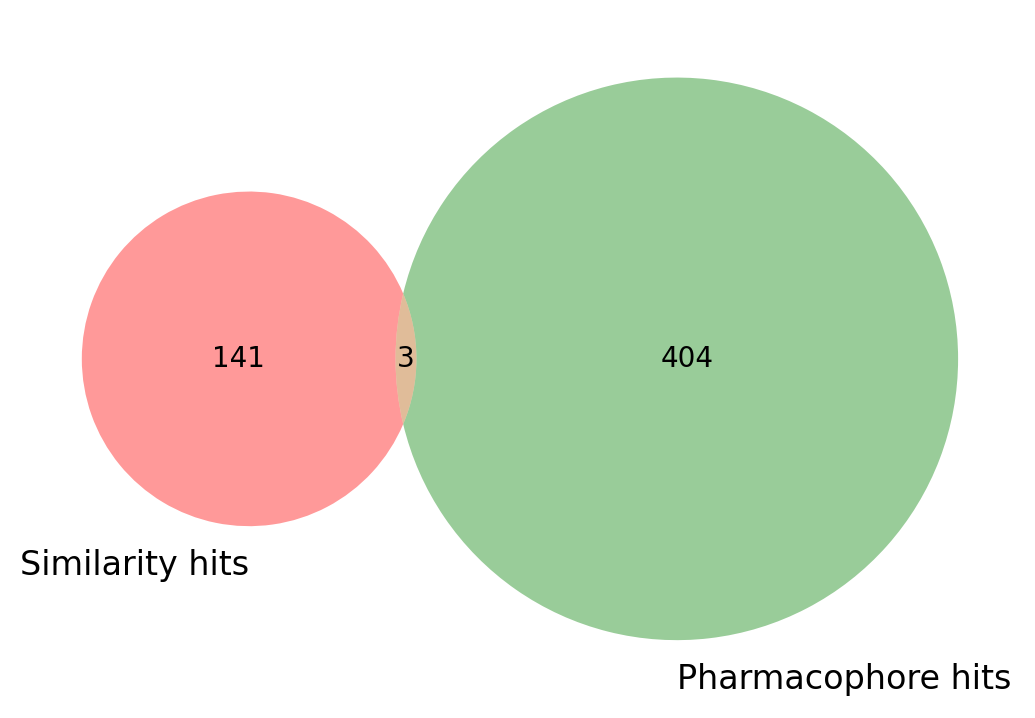

In [95]:
intersection= list(set(res50['molecule_chembl_id']) & set(chembl_ids))

similarity= set(res50['molecule_chembl_id'])
pharmacophore= set(chembl_ids)
intersection

# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (len(similarity), len(pharmacophore), len(intersection)), set_labels = ('Similarity hits', 'Pharmacophore hits'))
plt.show()


## ANOTHER VENN DIAGRAM

This was some initial work I did but was unsuccesful. Why? Because I was trying to find the intersection based on a similarity+pharmaphore screening I did with a statin.
Clearly, there were no compounds at this intersection.

In [17]:
similarity = new_client.similarity
res50_statin = similarity.filter(chembl_id='CHEMBL54440', similarity=40).only(['molecule_chembl_id', 'pref_name', 'similarity','molecule_structures'])
res50_statin=pd.DataFrame(res50_statin)
# CHEMBL
res50_statin['Smiles'] = res50_statin['molecule_structures'].apply(lambda x: x.get("canonical_smiles", None))


In [18]:
len(res50_statin)

154

In [ ]:
file=open ('/content/drive/MyDrive/Colab Notebooks/Structur/final/1h8w_pharmacophore.sdf')
text=file.read()
import re

# Define a regular expression pattern to match ChEMBL IDs
chembl_pattern = re.compile(r'CHEMBL\d+')

# Find all occurrences of ChEMBL IDs in the text
chembl_ids_1h8w = chembl_pattern.findall(text)

# Print the extracted ChEMBL IDs
print(chembl_ids_1h8w)

In [97]:
len(chembl_ids_1h8w)

991

In [98]:
intersection_statin= list(set(res50_statin['molecule_chembl_id']) & set(chembl_ids_1h8w))

In [99]:
len(intersection_statin)

2

In [21]:
!pip install venny4py


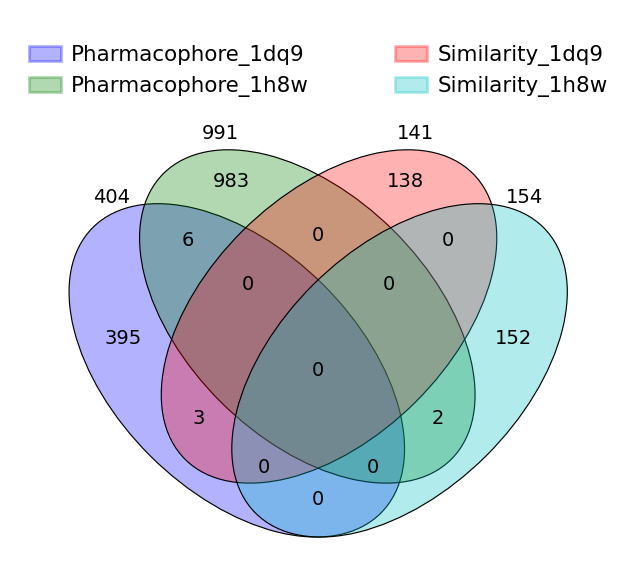

In [100]:

from venny4py.venny4py import *

#dict of sets
sets = {
    'Pharmacophore_1dq9': set(chembl_ids),
    'Pharmacophore_1h8w': set(chembl_ids_1h8w),
    'Similarity_1dq9': set(res50['molecule_chembl_id']),
    'Similarity_1h8w': set(res50_statin['molecule_chembl_id'])}

venny4py(sets=sets)

# VISUALIZATION

In [28]:
filtered_df = res50[res50['molecule_chembl_id'].isin(intersection)].reset_index(drop=True)

In [29]:
filtered_df

,molecule_chembl_id,molecule_structures,pref_name,similarity,Smiles
0,CHEMBL1949897,{'canonical_smiles': 'CCCCCCCCCC(=O)SCCNC(=O)C...,Decanoyl-CoA,82.3529422283172607421875,CCCCCCCCCC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(...
1,CHEMBL505121,{'canonical_smiles': 'CC(=O)N[C@@H](CCCCNC(=O)...,None,71.929824352264404296875,CC(=O)N[C@@H](CCCCNC(=O)CSCCNC(=O)CCNC(=O)[C@H...
2,CHEMBL1161857,{'canonical_smiles': 'CC(C)(COP(=O)(O)OP(=O)(O...,None,69.23077106475830078125,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...


ADD THE CONTROLS

In [30]:
filtered_df = filtered_df.append({'molecule_chembl_id': 'CHEMBL1794644', 'pref_name': 'HMG-CoA' }, ignore_index=True)


<ipython-input-30-1a8f6d1d6df1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_df = filtered_df.append({'molecule_chembl_id': 'CHEMBL1794644', 'pref_name': 'HMG-CoA' }, ignore_index=True)


In [31]:
filtered_df = filtered_df.append({'molecule_chembl_id': 'CHEMBL149701', 'pref_name': 'Negative control' }, ignore_index=True)

<ipython-input-31-8b8564aa1ac1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_df = filtered_df.append({'molecule_chembl_id': 'CHEMBL149701', 'pref_name': 'Negative control' }, ignore_index=True)


In [32]:
filtered_df

,molecule_chembl_id,molecule_structures,pref_name,similarity,Smiles
0,CHEMBL1949897,{'canonical_smiles': 'CCCCCCCCCC(=O)SCCNC(=O)C...,Decanoyl-CoA,82.3529422283172607421875,CCCCCCCCCC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(...
1,CHEMBL505121,{'canonical_smiles': 'CC(=O)N[C@@H](CCCCNC(=O)...,None,71.929824352264404296875,CC(=O)N[C@@H](CCCCNC(=O)CSCCNC(=O)CCNC(=O)[C@H...
2,CHEMBL1161857,{'canonical_smiles': 'CC(C)(COP(=O)(O)OP(=O)(O...,None,69.23077106475830078125,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...
3,CHEMBL1794644,NaN,HMG-CoA,NaN,NaN
4,CHEMBL149701,NaN,Negative control,NaN,NaN


In [33]:
molecule = new_client.molecule
filtered_df_all = molecule.filter(molecule_chembl_id__in=list(filtered_df["molecule_chembl_id"])).only(['molecule_chembl_id', 'pref_name','molecule_structures'])

In [34]:
filtered_df_all= pd.DataFrame(filtered_df_all)

In [35]:
filtered_df_all['Smiles'] = filtered_df_all['molecule_structures'].apply(lambda x: x.get("canonical_smiles", None))


In [36]:
filtered_df_all['Mol'] = filtered_df_all['Smiles'].apply(Chem.MolFromSmiles)


In [37]:
filtered_df_all

,molecule_chembl_id,molecule_structures,pref_name,Smiles,Mol
0,CHEMBL149701,{'canonical_smiles': 'C[C@H]1C=CC[C@H](COC(=O)...,None,C[C@H]1C=CC[C@H](COC(=O)C(C)(C)C)[C@H]1CCC(O)C...,<rdkit.Chem.rdchem.Mol object at 0x79b82ae4b450>
1,CHEMBL505121,{'canonical_smiles': 'CC(=O)N[C@@H](CCCCNC(=O)...,None,CC(=O)N[C@@H](CCCCNC(=O)CSCCNC(=O)CCNC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x79b82ae4b4c0>
2,CHEMBL1161857,{'canonical_smiles': 'CC(C)(COP(=O)(O)OP(=O)(O...,None,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...,<rdkit.Chem.rdchem.Mol object at 0x79b82ae4aff0>
3,CHEMBL1794644,{'canonical_smiles': 'CC(C)(CO[P@@](=O)(O)O[P@...,3-HYDROXY-3-METHYLGLUTARYL-COENZYME A,CC(C)(CO[P@@](=O)(O)O[P@@](=O)(O)OC[C@H]1O[C@@...,<rdkit.Chem.rdchem.Mol object at 0x79b82ae4b220>
4,CHEMBL1949897,{'canonical_smiles': 'CCCCCCCCCC(=O)SCCNC(=O)C...,Decanoyl-CoA,CCCCCCCCCC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(...,<rdkit.Chem.rdchem.Mol object at 0x79b82ae4b1b0>


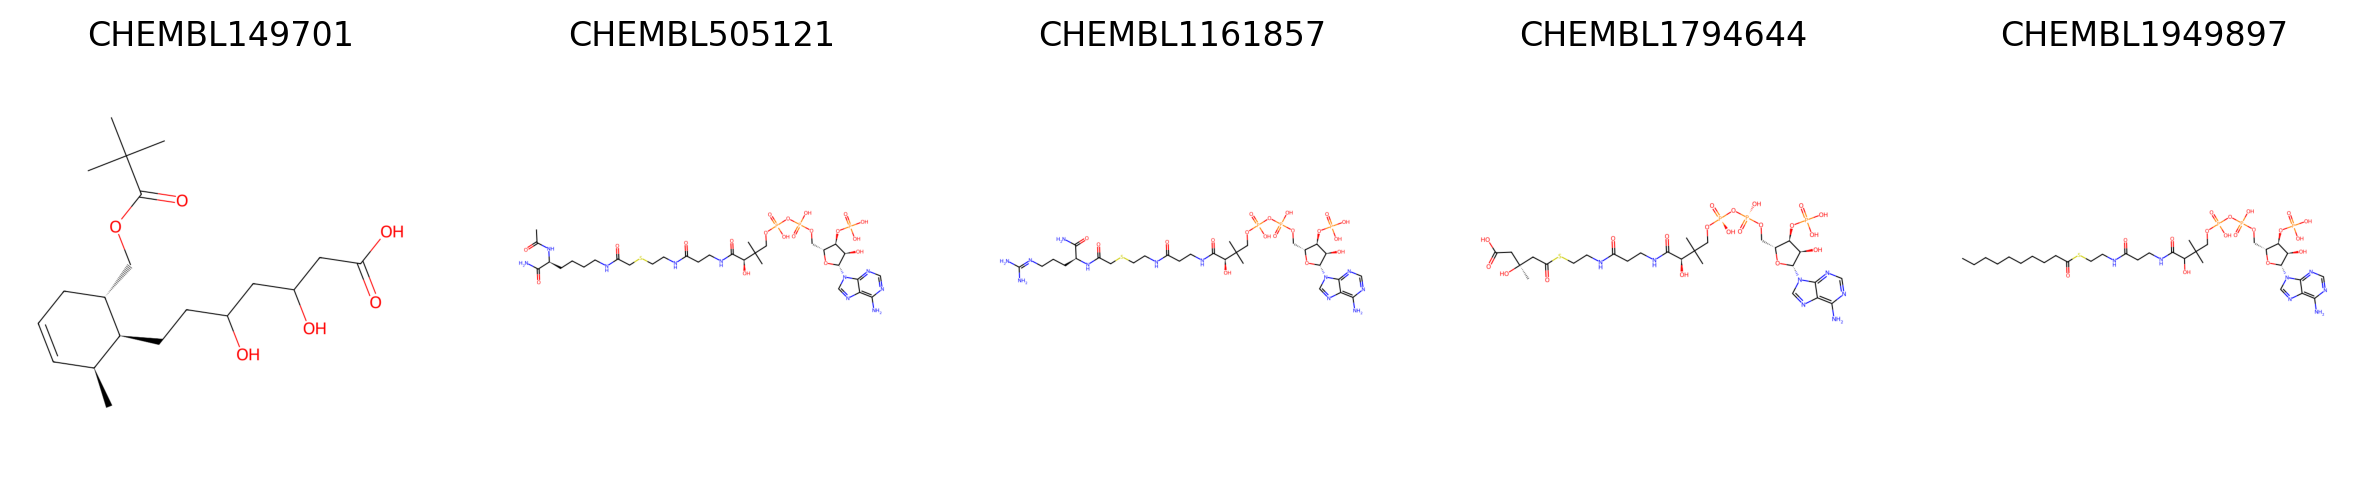

In [38]:
import matplotlib.pyplot as plt
# Draw the first 10 molecules in a 2x5 grid
molecules_to_show = filtered_df_all.iloc[:5]  # Select the first 10 rows
# Create a 1x5 grid of subplots for molecule display
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.1) # Adjust vertical spacing

# Loop through the subplots and display each molecule
for i, ax in enumerate(axes.ravel()):
    mol = molecules_to_show['Mol'].iloc[i]  # Get the RDKit molecule
    img = Draw.MolToImage(mol, size=(800, 800))  # Generate and display the image
    ax.imshow(img)  # Show the molecule image
    ax.set_title(molecules_to_show['molecule_chembl_id'].iloc[i])  # Set a title for the subplot
    ax.axis('off')  # Turn off axis labels and ticks

plt.show()  # Display the figure with the molecules

Now let's obtain the sdf file of the molecules...
How? easy, just intersecting the names of the 14 compounds

In [39]:
chembl_ids_list_intersect=list(filtered_df["molecule_chembl_id"])

In [40]:
len(chembl_ids_list_intersect)

5

In [41]:
chembl_ids_list_intersect

['CHEMBL1949897',
 'CHEMBL505121',
 'CHEMBL1161857',
 'CHEMBL1794644',
 'CHEMBL149701']

In [43]:
# Read the content of the SDF file
#with open('/content/drive/MyDrive/Colab Notebooks/Structur/final/1dq9_pharmacophore.sdf', 'r') as sdf_file:
#    sdf_content = sdf_file.read()

selected_molecules=[]

# Read molecules from the input SDF file
suppl = Chem.SDMolSupplier('/content/drive/MyDrive/Colab Notebooks/Structur/final/1dq9_pharmacophore.sdf')
for mol in suppl:
    if mol is not None:
        # Extract Chembl ID using regular expressions on the molecule's title or another relevant field
        title = mol.GetProp("_Name")  # Adjust this based on your SDF file structure
        match = re.search(r'CHEMBL\d+', title)
        if match:
            chembl_id = match.group(0)
            # Check if the Chembl ID is in the list of specified Chembl IDs
            if chembl_id in chembl_ids_list_intersect:
                selected_molecules.append(mol)



# Write the selected molecules to a new SDF file
with Chem.SDWriter('/content/drive/MyDrive/Colab Notebooks/Structur/final/1dq9_pharmacophore_intersection.sdf') as writer:
    for mol in selected_molecules:
        writer.write(mol)

HERE ONLY THE 3 CANDIDATES MOLECULES ARE BEING EXPORTED TO .SDF.
WITH CHIMERA I CREATED A .SDF FOR THE CONTROLS AND ATTACHED THEM TO THE INTERSECTION.sdf



1dq9_pharmacophore_intersection.sdf + 2 controls -> 1dq9_pharmacophore_intersection_3.sdf

This file is used for web-based docking methods.

# PCA

In [72]:
file=open ('/content/drive/MyDrive/Colab Notebooks/Structur/final/1dq9_pharmacophore_intersection_3.sdf')
text=file.read()
import re

# Define a regular expression pattern to match ChEMBL IDs
chembl_pattern = re.compile(r'CHEMBL\d+')

# Find all occurrences of ChEMBL IDs in the text
chembl_ids_intersection = chembl_pattern.findall(text)

# Print the extracted ChEMBL IDs
print(chembl_ids_intersection)

['CHEMBL1949897', 'CHEMBL505121', 'CHEMBL1161857']


It's not detecting the controls because they end with _positive and _negative, I will add them manually.

In [73]:
chembl_ids_intersection

['CHEMBL1949897', 'CHEMBL505121', 'CHEMBL1161857']

In [74]:
list(chembl_ids_intersection)

['CHEMBL1949897', 'CHEMBL505121', 'CHEMBL1161857']

In [75]:
# Append the control ChEMBL ID
chembl_ids_intersection.append('CHEMBL1794644')
chembl_ids_intersection.append('CHEMBL149701')


# Print the updated list
print(chembl_ids_intersection)


['CHEMBL1949897', 'CHEMBL505121', 'CHEMBL1161857', 'CHEMBL1794644', 'CHEMBL149701']


In [76]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
df_pca = molecule.filter(molecule_chembl_id__in=list(chembl_ids_intersection)).only(['molecule_chembl_id', 'pref_name','molecule_structures'])
df_pca

[{'molecule_chembl_id': 'CHEMBL149701', 'molecule_structures': {'canonical_smiles': 'C[C@H]1C=CC[C@H](COC(=O)C(C)(C)C)[C@H]1CCC(O)CC(O)CC(=O)O', 'molfile': '\n     RDKit          2D\n\n 26 26  0  0  1  0  0  0  0  0999 V2000\n    2.9000   -3.2292    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    7.9292   -1.9875    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    8.6542   -2.3917    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    5.0625   -4.4792    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.1875   -3.6500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.6250   -3.6500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    5.0625   -3.6500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    5.0625   -6.1417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.9000   -2.4000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    5.7792   -5.7250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    5.7792   -4.8917    0.0000 C   0  0  0  0  0  0  0  0  0  0 

In [77]:
df_pca =pd.DataFrame(df_pca)

In [78]:
df_pca['Smiles'] = df_pca['molecule_structures'].apply(lambda x: x.get("canonical_smiles", None))


In [79]:
df_pca

,molecule_chembl_id,molecule_structures,pref_name,Smiles
0,CHEMBL149701,{'canonical_smiles': 'C[C@H]1C=CC[C@H](COC(=O)...,None,C[C@H]1C=CC[C@H](COC(=O)C(C)(C)C)[C@H]1CCC(O)C...
1,CHEMBL505121,{'canonical_smiles': 'CC(=O)N[C@@H](CCCCNC(=O)...,None,CC(=O)N[C@@H](CCCCNC(=O)CSCCNC(=O)CCNC(=O)[C@H...
2,CHEMBL1161857,{'canonical_smiles': 'CC(C)(COP(=O)(O)OP(=O)(O...,None,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...
3,CHEMBL1794644,{'canonical_smiles': 'CC(C)(CO[P@@](=O)(O)O[P@...,3-HYDROXY-3-METHYLGLUTARYL-COENZYME A,CC(C)(CO[P@@](=O)(O)O[P@@](=O)(O)OC[C@H]1O[C@@...
4,CHEMBL1949897,{'canonical_smiles': 'CCCCCCCCCC(=O)SCCNC(=O)C...,Decanoyl-CoA,CCCCCCCCCC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(...


In [80]:
#Define the descriptors to be analyzed
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    TPSA = Descriptors.TPSA (molecule)
    # Check if Ro5 conditions fulfilled
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5, TPSA < 140]
    ro5_fulfilled = sum(conditions) > 4
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, TPSA, ro5_fulfilled],
        index=['molecular_weight', 'n_hba', 'n_hbd', 'logp', 'TPSA', 'ro5_fulfilled'],
    )

In [81]:
from rdkit.Chem import Descriptors

In [82]:
# Calculate RO5 properties
ro5_properties = df_pca['Smiles'].apply(calculate_ro5_properties)
ro5_properties.head()

,molecular_weight,n_hba,n_hbd,logp,TPSA,ro5_fulfilled
0,370.235539,5,3,2.7709,104.06,True
1,994.242200,21,12,-2.5854,447.85,False
2,980.237784,21,13,-3.8382,483.15,False
3,911.157468,21,11,-1.7195,421.16,False
4,921.250974,19,9,1.8054,363.63,False


In [83]:
# Concatenate molecules with Ro5 data
df_pca = pd.concat([df_pca, ro5_properties], axis=1)
df_pca

,molecule_chembl_id,molecule_structures,pref_name,Smiles,molecular_weight,n_hba,n_hbd,logp,TPSA,ro5_fulfilled
0,CHEMBL149701,{'canonical_smiles': 'C[C@H]1C=CC[C@H](COC(=O)...,None,C[C@H]1C=CC[C@H](COC(=O)C(C)(C)C)[C@H]1CCC(O)C...,370.235539,5,3,2.7709,104.06,True
1,CHEMBL505121,{'canonical_smiles': 'CC(=O)N[C@@H](CCCCNC(=O)...,None,CC(=O)N[C@@H](CCCCNC(=O)CSCCNC(=O)CCNC(=O)[C@H...,994.242200,21,12,-2.5854,447.85,False
2,CHEMBL1161857,{'canonical_smiles': 'CC(C)(COP(=O)(O)OP(=O)(O...,None,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...,980.237784,21,13,-3.8382,483.15,False
3,CHEMBL1794644,{'canonical_smiles': 'CC(C)(CO[P@@](=O)(O)O[P@...,3-HYDROXY-3-METHYLGLUTARYL-COENZYME A,CC(C)(CO[P@@](=O)(O)O[P@@](=O)(O)OC[C@H]1O[C@@...,911.157468,21,11,-1.7195,421.16,False
4,CHEMBL1949897,{'canonical_smiles': 'CCCCCCCCCC(=O)SCCNC(=O)C...,Decanoyl-CoA,CCCCCCCCCC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(...,921.250974,19,9,1.8054,363.63,False


In [84]:
maccs_molecules = []
for smiles in df_pca['Smiles']:
  mol = Chem.MolFromSmiles(smiles)
  maccs_fingerprint = AllChem.GetMACCSKeysFingerprint(mol)
  maccs_molecules.append(maccs_fingerprint)

maccs_molecules_df = pd.DataFrame(maccs_molecules)


In [85]:
maccs_molecules_expanded= pd.DataFrame(maccs_molecules_df[0].apply(list).tolist(), columns=[f'MACCS_{i+1}' for i in range(167)])


In [86]:
df_pca_final = pd.concat([df_pca.reset_index(drop=True), maccs_molecules_expanded.reset_index(drop=True)], axis=1)


In [87]:
df_pca_final

,molecule_chembl_id,molecule_structures,pref_name,Smiles,molecular_weight,n_hba,n_hbd,logp,TPSA,ro5_fulfilled,...,MACCS_158,MACCS_159,MACCS_160,MACCS_161,MACCS_162,MACCS_163,MACCS_164,MACCS_165,MACCS_166,MACCS_167
0,CHEMBL149701,{'canonical_smiles': 'C[C@H]1C=CC[C@H](COC(=O)...,None,C[C@H]1C=CC[C@H](COC(=O)C(C)(C)C)[C@H]1CCC(O)C...,370.235539,5,3,2.7709,104.06,True,...,1,0,1,1,0,0,1,1,1,0
1,CHEMBL505121,{'canonical_smiles': 'CC(=O)N[C@@H](CCCCNC(=O)...,None,CC(=O)N[C@@H](CCCCNC(=O)CSCCNC(=O)CCNC(=O)[C@H...,994.242200,21,12,-2.5854,447.85,False,...,1,1,1,1,1,1,1,1,1,0
2,CHEMBL1161857,{'canonical_smiles': 'CC(C)(COP(=O)(O)OP(=O)(O...,None,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...,980.237784,21,13,-3.8382,483.15,False,...,1,1,1,1,1,1,1,1,1,0
3,CHEMBL1794644,{'canonical_smiles': 'CC(C)(CO[P@@](=O)(O)O[P@...,3-HYDROXY-3-METHYLGLUTARYL-COENZYME A,CC(C)(CO[P@@](=O)(O)O[P@@](=O)(O)OC[C@H]1O[C@@...,911.157468,21,11,-1.7195,421.16,False,...,1,1,1,1,1,1,1,1,1,0
4,CHEMBL1949897,{'canonical_smiles': 'CCCCCCCCCC(=O)SCCNC(=O)C...,Decanoyl-CoA,CCCCCCCCCC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(...,921.250974,19,9,1.8054,363.63,False,...,1,1,1,1,1,1,1,1,1,0


In [88]:
df_pca_final= df_pca_final.drop(columns=["pref_name","molecule_structures","Smiles","ro5_fulfilled"])

In [89]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

pca_pipe = make_pipeline(StandardScaler(), PCA())


WE IDENTIFY THE MOLECULE WHICH IS "CLOSER" TO HMG-COA

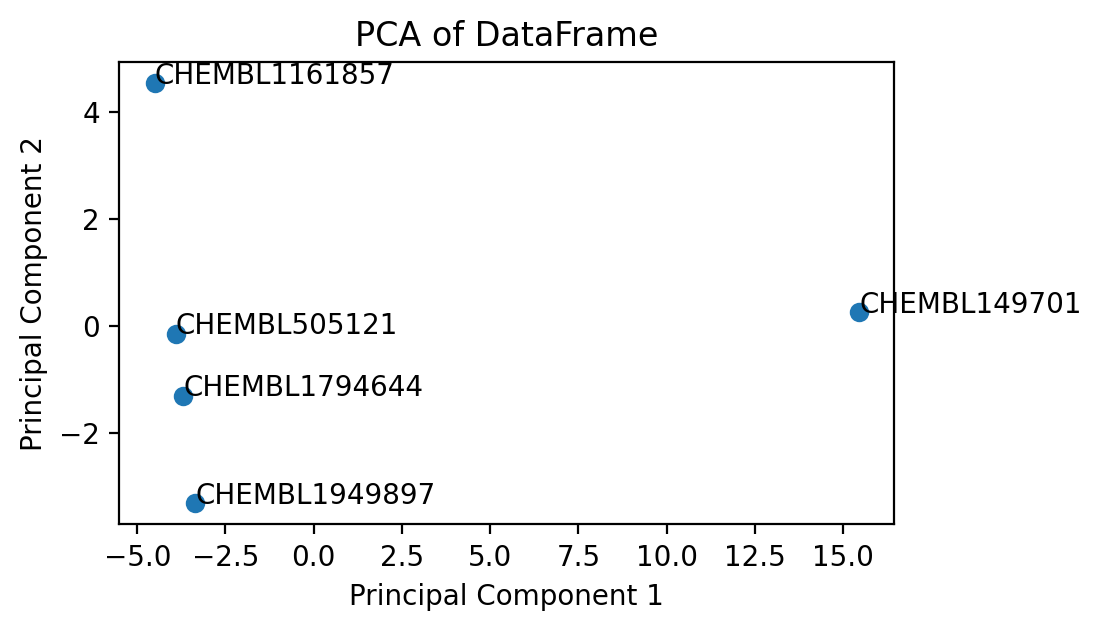

In [94]:
# Fit the pipeline and transform the data
X_pca = pca_pipe.fit_transform(df_pca_final.drop(columns=["molecule_chembl_id"]))

# Add the PCA components to the DataFrame
df_pca_final['PCA_Component_1'] = X_pca[:, 0]
df_pca_final['PCA_Component_2'] = X_pca[:, 1]

# Plot the PCA results
plt.figure(figsize=(5, 3))
plt.scatter(df_pca_final['PCA_Component_1'], df_pca_final['PCA_Component_2'])
plt.title('PCA of DataFrame')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Annotate points with labels
for i, row in df_pca_final.iterrows():
    plt.text(row['PCA_Component_1'], row['PCA_Component_2'], str(row['molecule_chembl_id']))
plt.show()